# Application of Wavelet based K-means Algorithm in Mammogram Segmentation


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans

In [7]:
class MammogramSegmentation():
    def __init__(self, image):
        self.image = image

    def wavelet_transform(self, wavelet="haar"):
        coeffs = pywt.dwt2(self.image, wavelet)
        # LL is Lower Resolution, LH is Horizontal Edge, HL is Vertical Edge, HH is Diagonal Edge
        LL, (LH, HL, HH) = coeffs

        LL *= 0
        # inverse wavelet transform
        self.transformed_image = pywt.idwt2((LL, (LH, HL, HH)), wavelet)
        self.final_image = self.image.astype(np.float32)

        self.final_image += self.transformed_image

    def kmeans_clustering(self, n_clusters=10):
        print(self.final_image.shape)
        self.final_image = self.final_image.reshape(-1, 1)
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=13)
        kmeans.fit(self.final_image)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        self.segmented_image = centers[labels.flatten()].reshape(self.image.shape).astype(np.uint8)
        # thresholding
        _, self.segmented_image = cv.threshold(self.segmented_image, 200, 255, cv.THRESH_BINARY)            


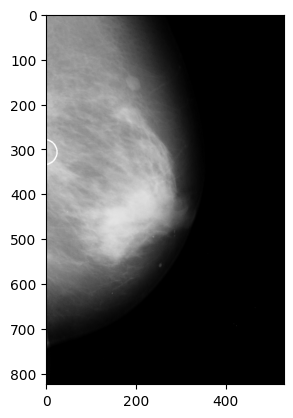

In [19]:
img = cv.imread('mdb072.pgm', cv.IMREAD_GRAYSCALE)
img = img[200:, 270:800]
# 266 517 28



x = 266 - 270
y = 1024 - 517 - 200
r = 28

cv.circle(img, (x, y), r, (255, 255, 255), 2)
plt.imshow(img, cmap='gray')
# draw a circle


(1024, 1024)


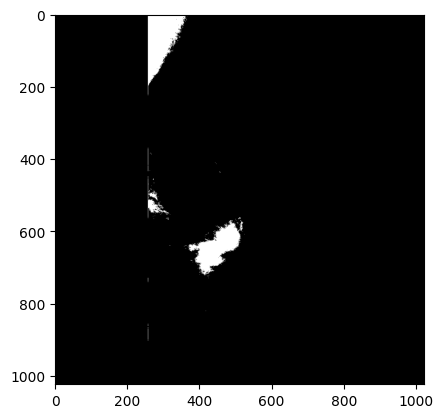

In [12]:
segmentation = MammogramSegmentation(img)
segmentation.wavelet_transform()
segmentation.kmeans_clustering()
# plt.imshow(img, cmap='gray')
plt.imshow(segmentation.segmented_image, cmap='gray')
plt.show()

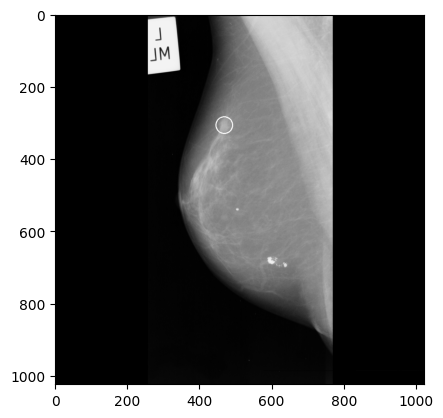

In [23]:
# 468 717 23
img = cv.imread('mdb075.pgm', cv.IMREAD_GRAYSCALE)
# 266 517 28



x = 468 
y = 1024 - 717
r = 23

cv.circle(img, (x, y), r, (255, 255, 255), 2)
plt.imshow(img, cmap='gray')
# draw a circle


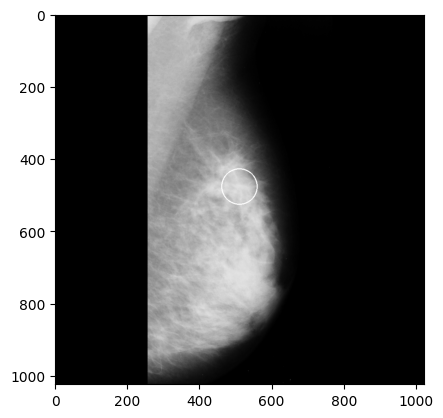

In [63]:
# 510 547 49

img = cv.imread('mdb090.pgm', cv.IMREAD_GRAYSCALE)
# 266 517 28



x = 510
y = 1024 - 547
r = 49

cv.circle(img, (x, y), r, (255, 255, 255), 2)
plt.imshow(img, cmap='gray')
# draw a circle

(1024, 1024)


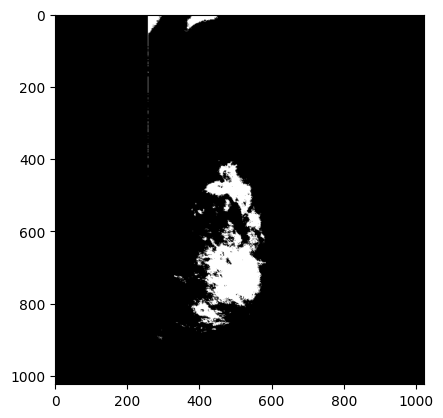

In [27]:
segmentation = MammogramSegmentation(img)
segmentation.wavelet_transform()
segmentation.kmeans_clustering()
# plt.imshow(img, cmap='gray')
plt.imshow(segmentation.segmented_image, cmap='gray')
plt.show()

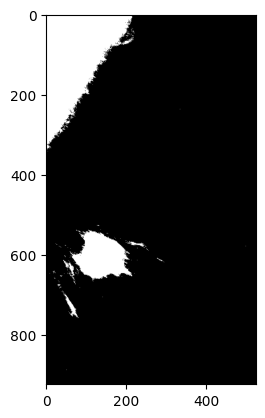

In [ ]:
img = cv.imread('mdb028.pgm', cv.IMREAD_GRAYSCALE)
img = img[100:, 200:-300]
segmentation = MammogramSegmentation(img)
segmentation.wavelet_transform()
segmentation.kmeans_clustering()
segmented_image = segmentation.segmented_image
plt.imshow(segmented_image, cmap='gray')
plt.show()

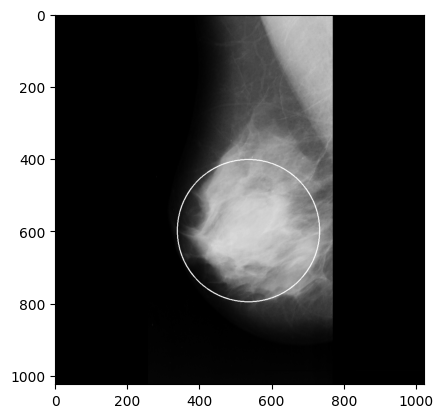

In [3]:
# load .pgm image
img = cv.imread('mdb001.pgm', cv.IMREAD_GRAYSCALE)

# draw a circle at 
x = 535
y = 1024 - 425
r = 197
cv.circle(img, (x, y), r, (255, 255, 255), 2)



plt.imshow(img, cmap='gray')

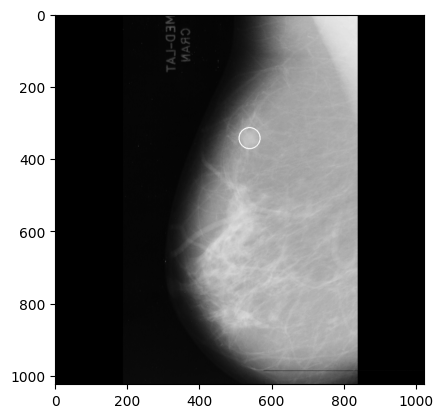

In [22]:
# load .pgm image
img = cv.imread('mdb023.pgm', cv.IMREAD_GRAYSCALE)

# draw a circle at 538 681 29
x = 538
y = 1024 - 681
r = 29

# convert from breast coordinate system to image coordinate system


cv.circle(img, (x, y), r, (255, 255, 255), 2)


plt.imshow(img, cmap='gray')

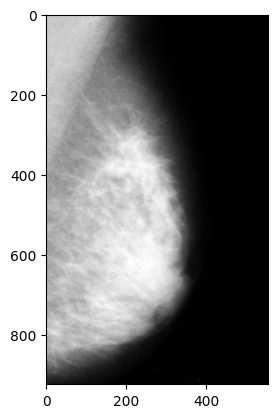

In [69]:
# load .pgm image
img = cv.imread('mdb090.pgm', cv.IMREAD_GRAYSCALE)
img = img[100:, 270:-200]

# draw a circle at 538 681 29
# x = 338
# y = 1024 - 314
# r = 56

# 338 314 56

# # convert from breast coordinate system to image coordinate system


# cv.circle(img, (x, y), r, (255, 255, 255), 2)


plt.imshow(img, cmap='gray')

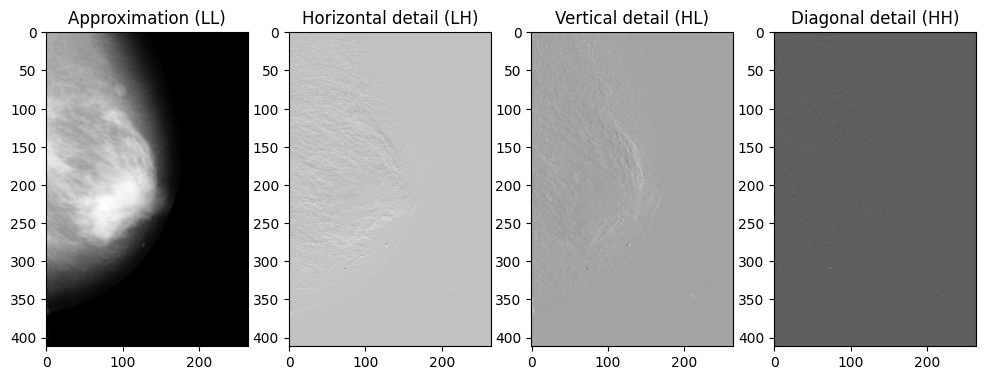

In [75]:
# img = cv.imread('mdb090.pgm', cv.IMREAD_GRAYSCALE)
# img = img[100:, 200:-300] # for 028
# img = img[100:, 270:-200] # for 090
img = cv.imread('mdb072.pgm', cv.IMREAD_GRAYSCALE)
img = img[200:, 270:800]

# img = img[:, 100:-280]

coeffs2 = pywt.dwt2(img, 'haar')

LL, (LH, HL, HH) = coeffs2

fig, ax = plt.subplots(1, 4, figsize=(12, 12))
ax = ax.ravel()
ax[0].imshow(LL, cmap='gray')
ax[0].set_title('Approximation (LL)')
ax[1].imshow(LH, cmap='gray')
ax[1].set_title('Horizontal detail (LH)')
ax[2].imshow(HL, cmap='gray')
ax[2].set_title('Vertical detail (HL)')
ax[3].imshow(HH, cmap='gray')
ax[3].set_title('Diagonal detail (HH)')
plt.show()


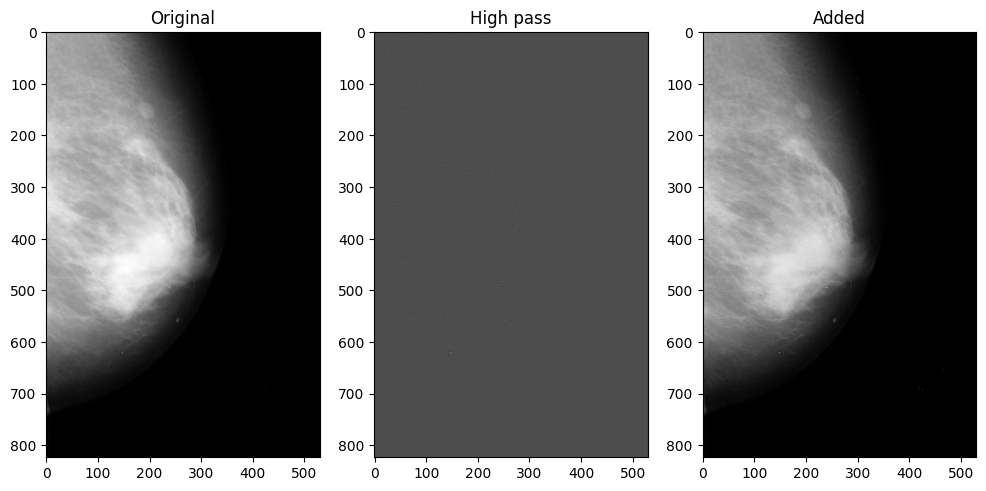

In [76]:
LL_zeroed = np.zeros(LL.shape)
coeffs2_modified = LL_zeroed, (LH, HL, HH)

high_pass_image = pywt.idwt2(coeffs2_modified, 'haar')

# added = img + high_pass_image
img = img.astype(np.float32)
added = img + high_pass_image * 1.5

added = np.clip(added, 0, 255)
added = added.astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(high_pass_image, cmap='gray')
ax[1].set_title('High pass')

ax[2].imshow(added, cmap='gray')
ax[2].set_title('Added')

plt.show()

/home/sanika/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sanika/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


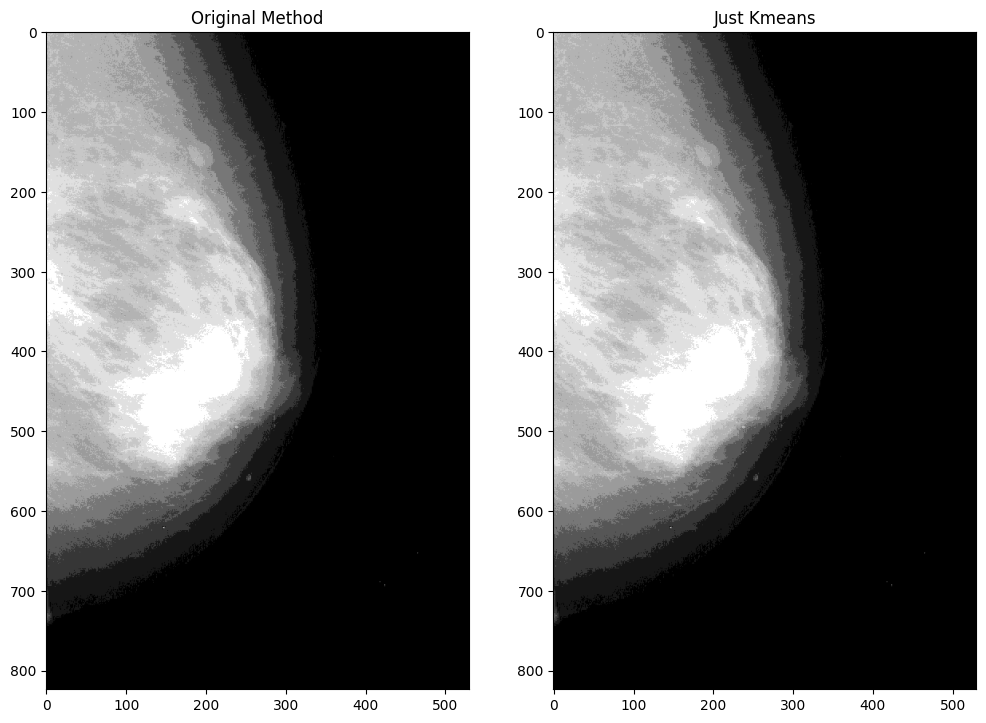

In [87]:
# kmeans  to get segmentation
k = 10
kmeans = KMeans(n_clusters=k, random_state = 42)
kmeans.fit(added.reshape(-1, 1))
labels = kmeans.labels_
centers = kmeans.cluster_centers_
segmented_image = centers[labels.flatten()].reshape(added.shape).astype(np.uint8)

kmeans = KMeans(n_clusters=k, random_state = 42)
kmeans.fit(added.reshape(-1, 1))
labels = kmeans.labels_
centers = kmeans.cluster_centers_
segmented_image_without_modifications = centers[labels.flatten()].reshape(img.shape).astype(np.uint8)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(segmented_image, cmap='gray')
axs[0].set_title('Original Method')
axs[1].imshow(segmented_image_without_modifications, cmap='gray')
axs[1].set_title('Just Kmeans')
plt.show()

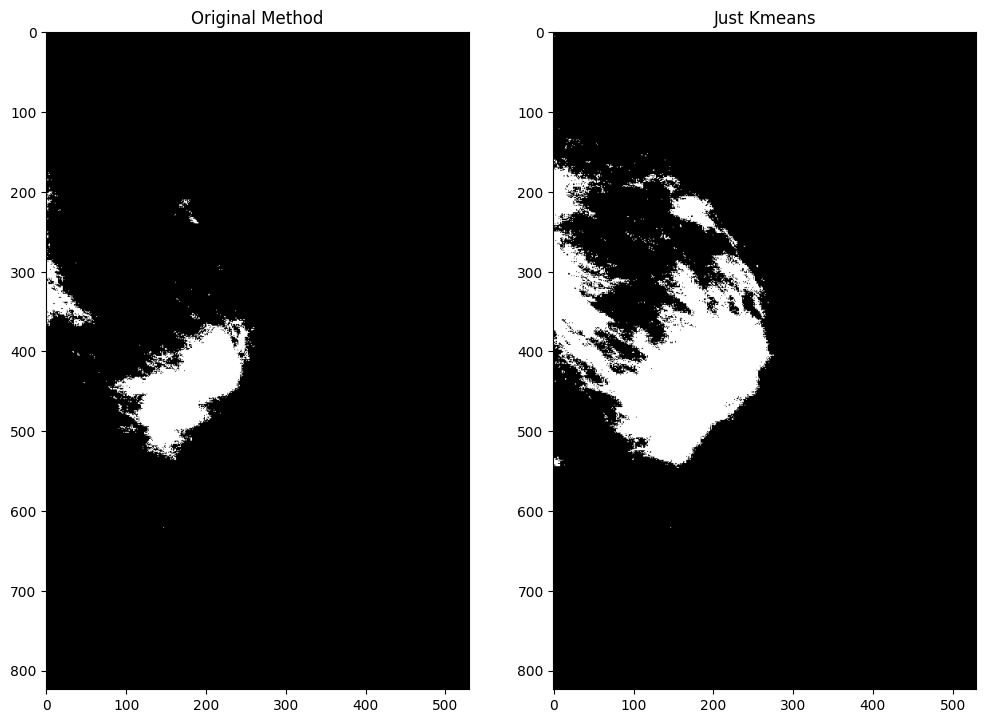

In [88]:
# threshold the images
_, thresholded = cv.threshold(segmented_image, 190, 255, cv.THRESH_BINARY)
_, thresholded_without_modifications = cv.threshold(segmented_image_without_modifications, 170, 255, cv.THRESH_BINARY)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(thresholded, cmap='gray')
axs[0].set_title('Original Method')
axs[1].imshow(thresholded_without_modifications, cmap='gray')
axs[1].set_title('Just Kmeans')
plt.show()

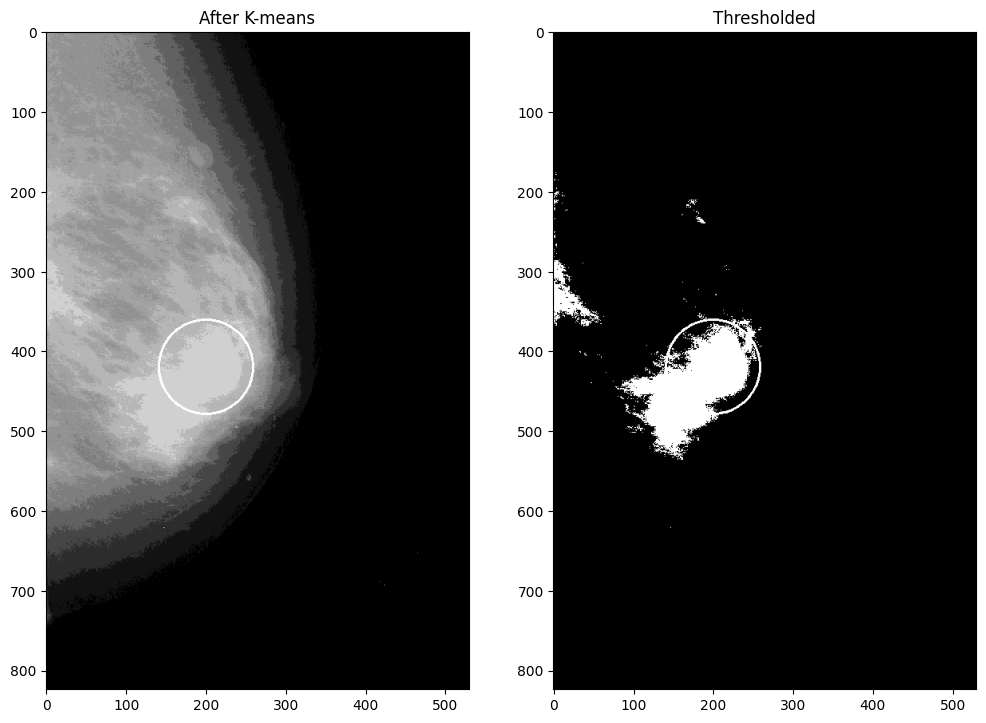

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
# draw circles
# img = img[100:, 200:-300] # for 028


x = 266 - 270
y = 1024 - 517 - 200
r = 28
# for 072


# x = 338 - 200
# y = 1024 - 314 - 100
# r = 56
x = 200
y = 420
r = 59
cv.circle(segmented_image, (x, y), r, (255, 255, 255), 2)
cv.circle(thresholded, (x, y), r, (255, 255, 255), 2)


# cv.circle(img, (x, y), r, (255, 255, 255), 2)


axs[0].imshow(segmented_image, cmap='gray')
axs[0].set_title('After K-means')
axs[1].imshow(thresholded, cmap='gray')
axs[1].set_title('Thresholded')

plt.show()
